In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# -----------------------------
# 1) 데이터 준비
# -----------------------------

cols = ["sepal_length", "sepal_width", "petal_length", "petal_width", "label"]
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/iris.data", header=None, names=cols).dropna()
df  # print(df) 와 동일

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
# 가능하면 프로그램을 step-by-step으로 수행하도록 나눠서 작성요망

In [6]:
#레이블 불균형 확인

df['label'].value_counts()

,count
label,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


Text(0.5, 1.0, 'Label')

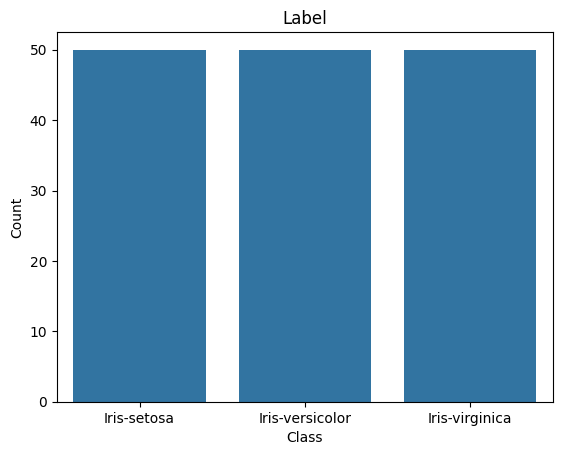

In [12]:
# 레이블 갯수 확인 (그래프)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="label")
plt.xlabel("Class")        # 그래프 x 축 이름
plt.ylabel("Count")        # 그래프 y 축 이름
plt.title("Label")

In [7]:
# 결측치 확인
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
label,0


In [13]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
label,0


In [22]:
df.columns  # 컬럼명 확인

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label'], dtype='object')

In [25]:
# 모든 레이블을 숫자로 변형

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [26]:
df # 모든 컬럼 값이 숫자로 변경되었는지 확인

,sepal_length,sepal_width,petal_length,petal_width,label
0,8,14,4,1,0
1,6,9,4,1,0
2,4,11,3,1,0
3,3,10,5,1,0
4,7,15,4,1,0
...,...,...,...,...,...
145,24,9,28,19,2
146,20,4,26,15,2
147,22,9,28,16,2
148,19,13,30,19,2


In [27]:
# 입력과 출력 분리

X = df.drop(columns=["label"])
y = df["label"]


In [28]:
X # 분리 후 확인

,sepal_length,sepal_width,petal_length,petal_width
0,8,14,4,1
1,6,9,4,1
2,4,11,3,1
3,3,10,5,1
4,7,15,4,1
...,...,...,...,...
145,24,9,28,19
146,20,4,26,15
147,22,9,28,16
148,19,13,30,19


In [29]:
y # 분리 후 확인

,label
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [30]:
# 훈련과 테스트 데이터 분리


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42

)



In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape  # 각 데이터의 shape 확인 (전체데이터 수, 컬럼숫자)

((120, 4), (30, 4), (120,), (30,))

In [33]:
# -----------------------------
# 2) 모델 구성
# -----------------------------
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
lr = LogisticRegression(max_iter=500)



In [34]:
# -----------------------------
# 3) 모델 학습
# -----------------------------

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=500)

In [37]:
# -----------------------------
# 4) 예측결과 생성
# -----------------------------


dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
lr_y_pred = lr.predict(X_test)

In [39]:
# 정답값 출력

y_test

,label
38,0
127,2
57,1
93,1
42,0
56,1
22,0
20,0
147,2
84,1


In [40]:
#예측값 출력

dt_y_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 0])

In [44]:
# -----------------------------
# 5) 예측결과와 정답을 비교한 정확도 평가
# -----------------------------

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dt_acc = accuracy_score(y_test, dt_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred )
lr_acc = accuracy_score(y_test, lr_y_pred)


print("=== DT Test Accuracy ===")
print(f"Decision Tree : {dt_acc:.4f}")
print (confusion_matrix(y_test,dt_y_pred))

print("=== RF Test Accuracy ===")
print(f"Random Forest : {rf_acc:.4f}")
print (confusion_matrix(y_test,rf_y_pred))

print("=== LR Test Accuracy ===")
print(f"Logistic Reg. : {lr_acc:.4f}")
print (confusion_matrix(y_test,lr_y_pred))


=== DT Test Accuracy ===
Decision Tree : 0.9333
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
=== RF Test Accuracy ===
Random Forest : 0.9000
[[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]
=== LR Test Accuracy ===
Logistic Reg. : 1.0000
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
